In [2]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

FIXED_RANDOMNESS = False

def BlackScholesSingleStockPath(S_0: float, r: float, sigma: float, T: float, N: int, rng: np.random.Generator):
    delta = T / N
    Z = rng.normal(loc=0, scale=1, size=(N))
    path = np.empty((N + 1), dtype=np.float64)
    path[0] = S_0
    for i in range(N):
        path[i + 1] = path[i] * np.exp((r - 0.5 * np.power(sigma, 2.0)) * delta + sigma * np.sqrt(delta) * Z[i])
    return path

In [3]:
S_0 = 100
T = 1.0
N = 252

r_values = [0.01, 0.05, 0.1]
sigma_values = [0.1, 0.2, 0.4]

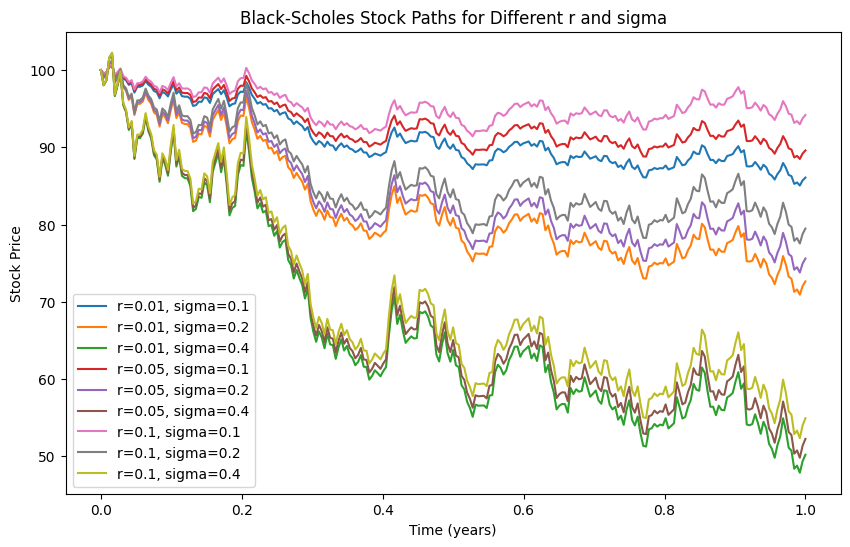

In [4]:
seed = 42 if FIXED_RANDOMNESS else np.random.randint(0, 999_999)
plt.figure(figsize=(10, 6))
for r in r_values:
    for sigma in sigma_values:
        rng = np.random.default_rng(seed)
        path = BlackScholesSingleStockPath(S_0, r, sigma, T, N, rng)
        plt.plot(np.linspace(0, T, N + 1), path, label=f"r={r}, sigma={sigma}")
        
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.title("Black-Scholes Stock Paths for Different r and sigma")
plt.legend()
plt.show()

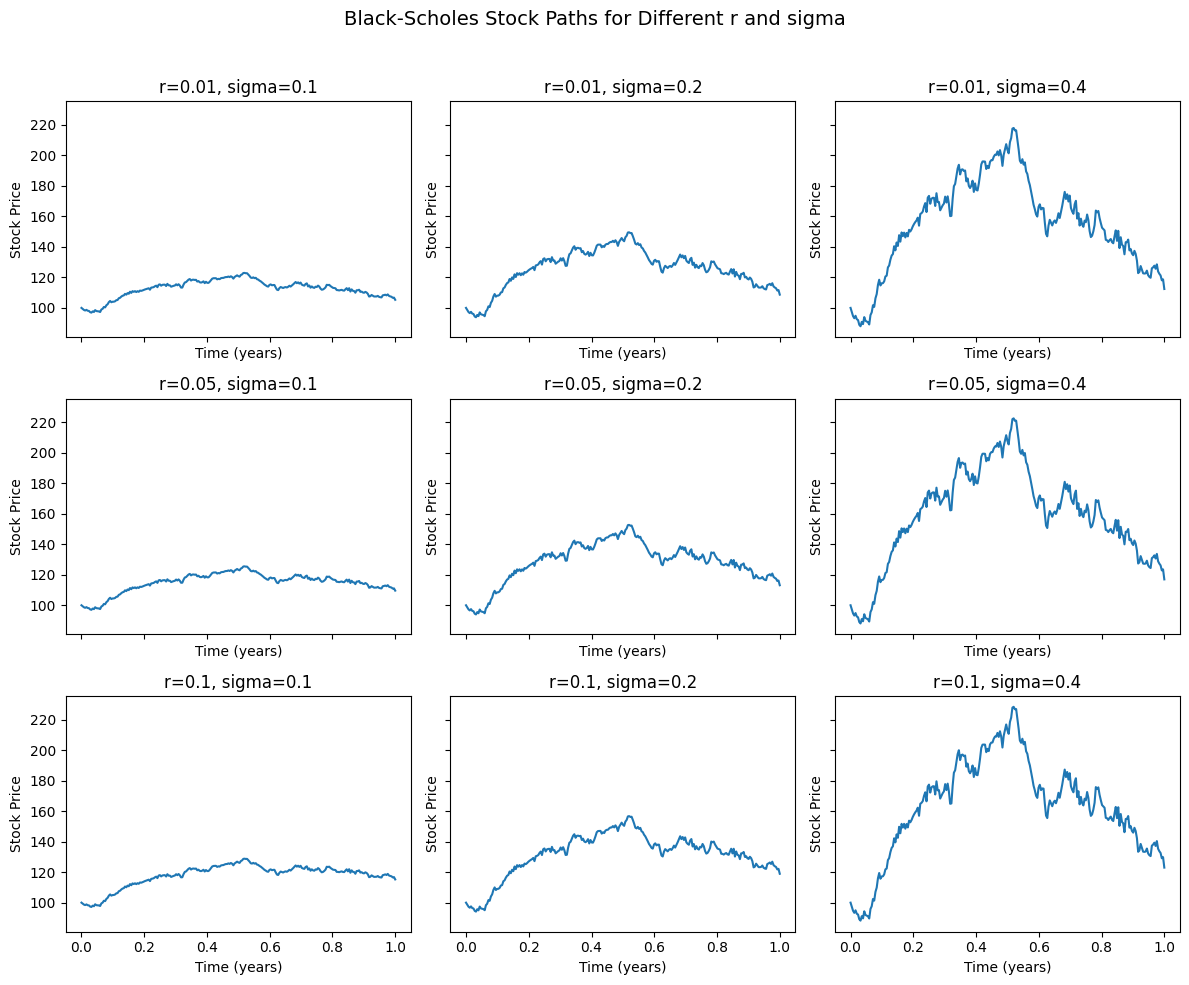

In [5]:
seed = 42 if FIXED_RANDOMNESS else np.random.randint(0, 999_999)
fig, axes = plt.subplots(len(r_values), len(sigma_values), figsize=(12, 10), sharex=True, sharey=True)

for i, r in enumerate(r_values):
    for j, sigma in enumerate(sigma_values):
        ax = axes[i, j]
        rng = np.random.default_rng(seed)  # Ensuring same randomness for each path
        path = BlackScholesSingleStockPath(S_0, r, sigma, T, N, rng)
        ax.plot(np.linspace(0, T, N + 1), path)
        ax.set_title(f"r={r}, sigma={sigma}")
        ax.set_xlabel("Time (years)")
        ax.set_ylabel("Stock Price")

plt.suptitle("Black-Scholes Stock Paths for Different r and sigma", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()